In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns" , 200)
import warnings
warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv("/kaggle/input/us-airline-flight-routes-and-fares-1993-2024/US Airline Flight Routes and Fares 1993-2024.csv")
data = flights.copy()
data.head()

tbl  Year  quarter  citymarketid_1  citymarketid_2  \
0  Table1a  2021        3           30135           33195   
1  Table1a  2021        3           30135           33195   
2  Table1a  2021        3           30140           30194   
3  Table1a  2021        3           30140           30194   
4  Table1a  2021        3           30140           30466   

                            city1                          city2  airportid_1  \
0  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
1  Allentown/Bethlehem/Easton, PA  Tampa, FL (Metropolitan Area)        10135   
2                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
3                 Albuquerque, NM          Dallas/Fort Worth, TX        10140   
4                 Albuquerque, NM                    Phoenix, AZ        10140   

   airportid_2 airport_1 airport_2  nsmiles  passengers    fare carrier_lg  \
0        14112       ABE       PIE      970         180   81.43         G4   
1        15304       ABE       TPA      970          19  208.93         DL   
2        11259       ABQ       DAL      580         204  184.56         WN   
3        11298       ABQ       DFW      580         264  182.64         AA   
4        14107       ABQ       PHX      328         398  177.11         WN   

   large_ms  fare_lg carrier_low   lf_ms  fare_low Geocoded_City1  \
0    1.0000    81.43          G4  1.0000     81.43            NaN   
1    0.4659   219.98          UA  0.1193    154.11            NaN   
2    0.9968   184.44          WN  0.9968    184.44            NaN   
3    0.9774   183.09          AA  0.9774    183.09            NaN   
4    0.6061   184.49          AA  0.3939    165.77            NaN   

  Geocoded_City2                tbl1apk  
0            NaN  202131013514112ABEPIE  
1            NaN  202131013515304ABETPA  
2            NaN  202131014011259ABQDAL  
3            NaN  202131014011298ABQDFW  
4            NaN  202131014014107ABQPHX

# Story of the Dataset

This dataset covers airline flight routes, fares, and passenger volumes within the United States from 1993 to 2024. It includes metrics like airport distances, passenger numbers, and fare data by airline carriers. The goal of this project is to predict average fares on specific routes, offering valuable insights into airline pricing strategies and passenger behavior.

Through this analysis, we aim to forecast fare trends, helping airlines optimize pricing and plan routes more effectively. The dataset provides a comprehensive resource for understanding air travel dynamics and market competition over the past three decades.

To go to the Kaggle page of the dataset, click [here](https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024)

"tbl , citymarketid_1, citymarketid_2 , airportid_1 , airportid_2 , Geocoded_City1, Geocoded_City2 , tbl1apk"

these columns are probably the key attributes that connect the tables in the database. So they will not help us in our analysis.

In [3]:
data = data.drop(columns=["tbl" , "citymarketid_1", "citymarketid_2" , "airportid_1" , "airportid_2" , "Geocoded_City1", "Geocoded_City2","tbl1apk"])

Let's look at the characteristics of the dataset :

In [4]:
data.shape

(245955, 15)

In [5]:
# structural information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         245955 non-null  int64  
 1   quarter      245955 non-null  int64  
 2   city1        245955 non-null  object 
 3   city2        245955 non-null  object 
 4   airport_1    245955 non-null  object 
 5   airport_2    245955 non-null  object 
 6   nsmiles      245955 non-null  int64  
 7   passengers   245955 non-null  int64  
 8   fare         245955 non-null  float64
 9   carrier_lg   244415 non-null  object 
 10  large_ms     244415 non-null  float64
 11  fare_lg      244415 non-null  float64
 12  carrier_low  244343 non-null  object 
 13  lf_ms        244343 non-null  float64
 14  fare_low     244343 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 28.1+ MB


In [6]:
data.describe()

Year        quarter        nsmiles     passengers  \
count  245955.000000  245955.000000  245955.000000  245955.000000   
mean     2008.524124       2.479153    1189.812319     299.476795   
std         8.703364       1.122149     703.143472     511.389486   
min      1993.000000       1.000000     109.000000       0.000000   
25%      2001.000000       1.000000     626.000000      21.000000   
50%      2008.000000       2.000000    1023.000000     113.000000   
75%      2016.000000       3.000000    1736.000000     339.000000   
max      2024.000000       4.000000    2724.000000    8301.000000   

                fare       large_ms        fare_lg          lf_ms  \
count  245955.000000  244415.000000  244415.000000  244343.000000   
mean      218.979587       0.665252     218.710963       0.450438   
std        82.372486       0.224635      84.674363       0.332669   
min        50.000000       0.003800      50.000000       0.010000   
25%       164.620000       0.480000     161.500000       0.158000   
50%       209.320000       0.652400     208.030000       0.360000   
75%       262.890000       0.871900     263.640000       0.750000   
max      3377.000000       1.000000    2725.600000       1.000000   

            fare_low  
count  244343.000000  
mean      190.675939  
std        73.577694  
min        50.000000  
25%       140.060000  
50%       181.630000  
75%       230.040000  
max      2725.600000

## Coefficient of Variation
To see the variation of the variables in the dataset, we will look at the coefficients of variation. The coefficient of variation (CV) is a statistical measure that measures the variation of a variable as the ratio of its standard deviation to its mean. It is usually expressed as a percentage (%).

Generally, with the coefficient of variation, we can see how homogeneous or heterogeneous the distribution of the data is, and the general levels of variation between the variables. Data with high coefficient of variation show more spread around the mean and contain more risk or uncertainty.

In [7]:
coefficient_of_variation = data.std(numeric_only=True) / data.mean(numeric_only=True)
print(coefficient_of_variation*100)

Year            0.433321
quarter        45.263412
nsmiles        59.097007
passengers    170.760972
fare           37.616513
large_ms       33.766870
fare_lg        38.715189
lf_ms          73.854646
fare_low       38.587823
dtype: float64


 As a result, features with high variation are more distributed than the mean.
 
 Let's visualize the result we obtained:

<Axes: >

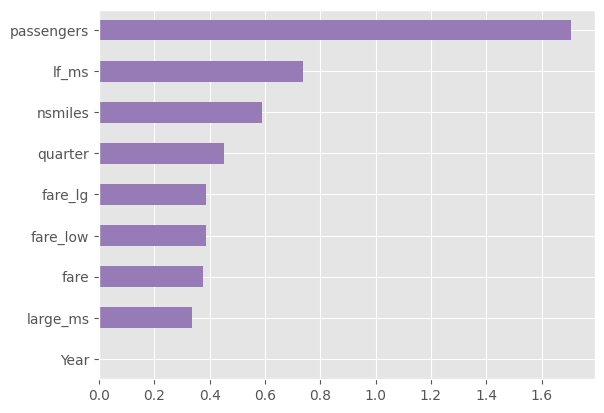

In [8]:
sorted_cv = coefficient_of_variation.sort_values()
sorted_cv.plot.barh(x = 'Variables', y = 'Coefficient of Variation', color = '#967bb6')

# Pandas Profiling
We can use the pandas_profiling library on the data, which does detailed analyses for us. This library presents us the summary statistics as an interactive HTML page.

It provides a general and comprehensive analysis for our work. Let's see it in action : 

In [9]:
import ydata_profiling
report = ydata_profiling.ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Actually we got almost all the information we need above, but since this is a working notebook, I want to show how we can alternatively get the information we need from the Data set.


After looking at the summary information about DataFrame, let's check for missing data:

In [10]:
data.isna().sum()

Year              0
quarter           0
city1             0
city2             0
airport_1         0
airport_2         0
nsmiles           0
passengers        0
fare              0
carrier_lg     1540
large_ms       1540
fare_lg        1540
carrier_low    1612
lf_ms          1612
fare_low       1612
dtype: int64

We know the story of the data set. Based on our domain knowledge we can make the following comments: 

* carrier_lg, large_ms, mouse_lg attributes are missing for the same records.

* properties carrier_low , lf_ms, fare_low are missing for the same records.  

I can group these properties. The information I wrote above can be said directly about the dataset because the largest airline is carrier_lg and the market share of this company is large_ms . So if carrier_lg is missing, the others should be missing automatically.

Similarly, the lowest fare carrier (fare_low) is carrier_low and its market share is large_ms. The features in the group are dependent on each other.

Let's see what percentage of the entire data frame the missing values make up :

In [11]:
eksik_yuzde  = (data.isna().sum().values / data.shape[0] ) * 100 

eksik_df = pd.DataFrame(eksik_yuzde, columns=["Eksik Değer Yüzdesi"] , index= data.columns)

In [12]:
eksik_df

Eksik Değer Yüzdesi
Year                    0.000000
quarter                 0.000000
city1                   0.000000
city2                   0.000000
airport_1               0.000000
airport_2               0.000000
nsmiles                 0.000000
passengers              0.000000
fare                    0.000000
carrier_lg              0.626131
large_ms                0.626131
fare_lg                 0.626131
carrier_low             0.655404
lf_ms                   0.655404
fare_low                0.655404

Let's see the missing data in graphical form : 

<Axes: >

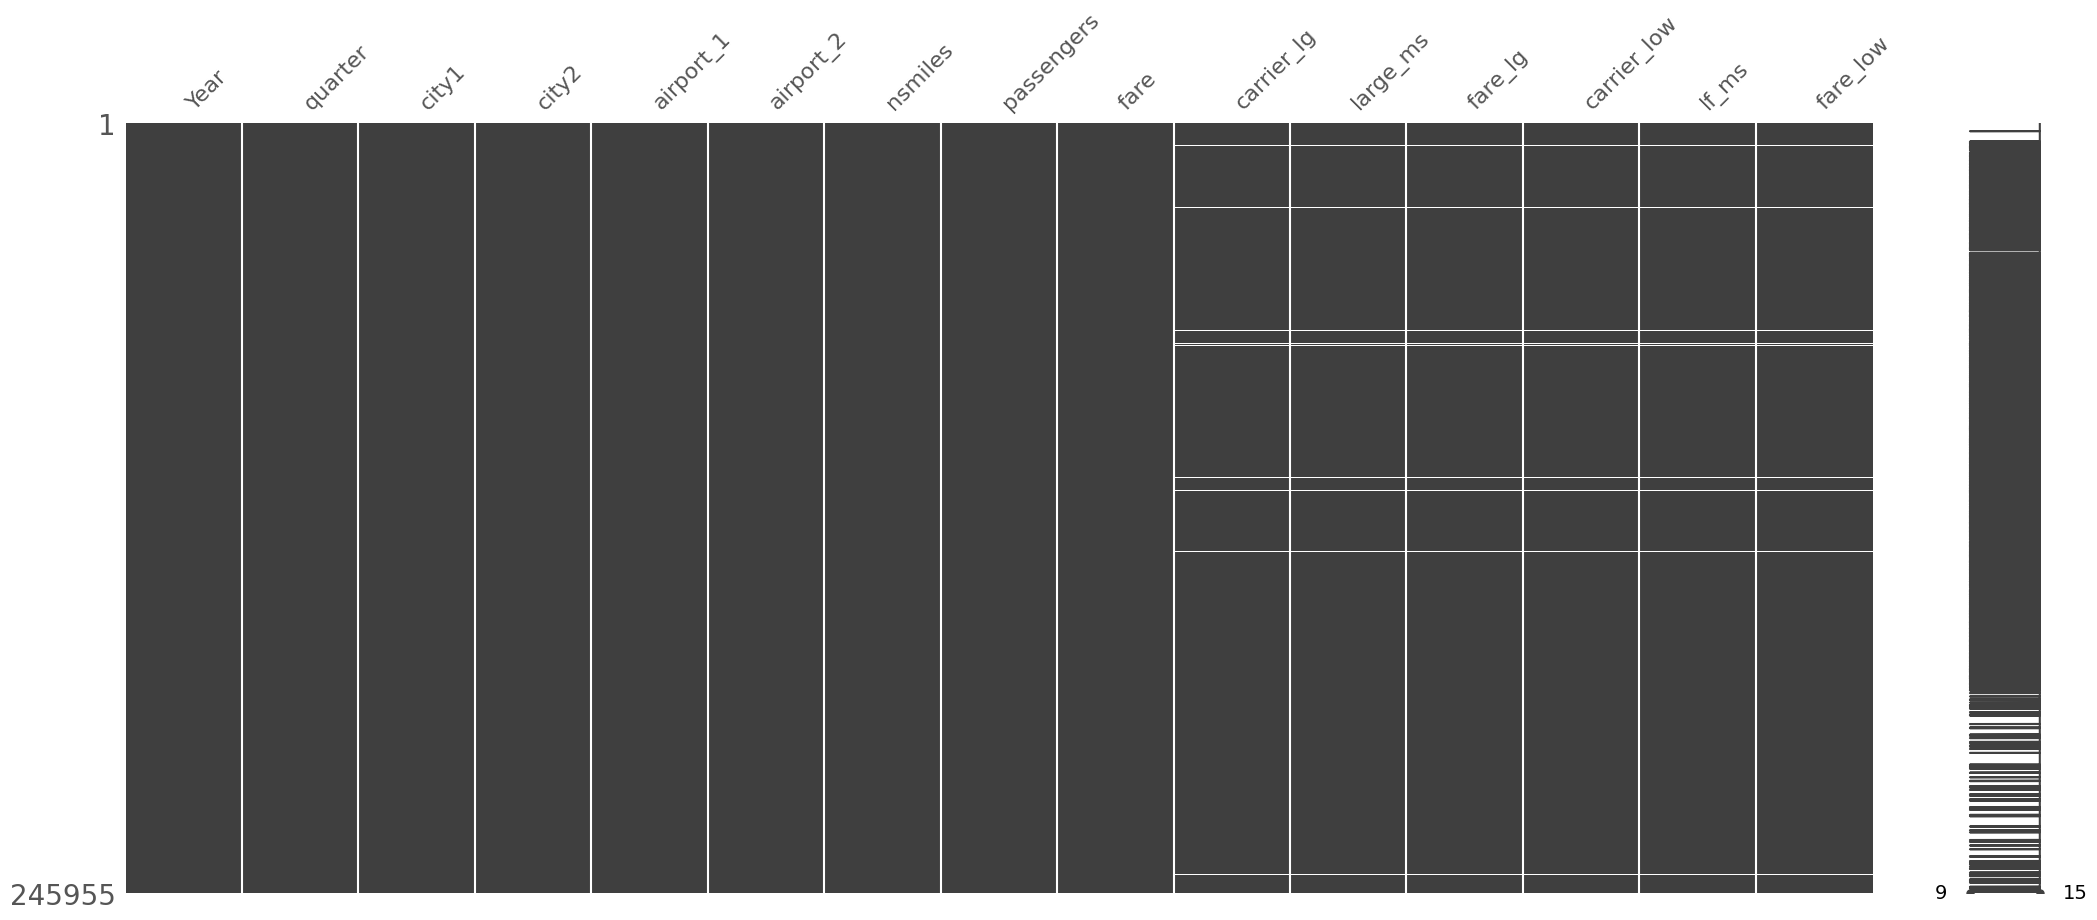

In [13]:
import missingno as msn

msn.matrix(data) ## this graph looks nice.:)

I am writing the following code to see how many records I will have to give up if I delete the missing data:

In [14]:
# I group features with missing data.
grup1 = ['carrier_lg', 'large_ms', 'fare_lg']
grup2 = ['carrier_low', 'lf_ms', 'fare_low']

# I am trying to determine the indexes of the rows with missing values.
eksik_indeks_grup1 = data[data[grup1].isna().any(axis=1)].index
eksik_indeks_grup2 = data[data[grup2].isna().any(axis=1)].index

# Her iki grup arasında ortak eksik değer var mı ? / Is there a common missing value between both groups?
ortak_eksik_indeks_grup1_grup2 = eksik_indeks_grup1.intersection(eksik_indeks_grup2)

print("Number of rows with common missing values between Group 1 and Group 2:", len(ortak_eksik_indeks_grup1_grup2))

Number of rows with common missing values between Group 1 and Group 2: 1540


The groups in Group 2 had 1612 missing data. 1540 of this data was in common with Group 1. So if they are deleted, I lose 1612 records.

In [15]:
df = data.dropna(how = "any")

In [16]:
df.isna().sum().sum() # total missing value.

0

In [17]:
df[df.duplicated()] 
# tüm özellikleri tekrar eden kayıt yok.( Belki farklı bir şekilde kontrol edilebilir).

Empty DataFrame
Columns: [Year, quarter, city1, city2, airport_1, airport_2, nsmiles, passengers, fare, carrier_lg, large_ms, fare_lg, carrier_low, lf_ms, fare_low]
Index: []

Veri setinde tekrarlı kayıt bulunmuyor. / There are no duplicate records in the dataset.

# Feature Engineering
Some columns have more than one piece of information and we can separate them. We can also use some columns to create new features that will be useful for analysis.

In [18]:
df["dep_city"] = df["city1"].str.split("," , expand=True)[0]
df["dep_state"] = df["city1"].str.split("," , expand=True)[1]

In [19]:
df["dest_city"] = df["city2"].str.split("," , expand=True)[0]
df["dest_state"] = df["city2"].str.split("," , expand=True)[1]

In [20]:
df['fare_per_mile'] = df['fare'] / df['nsmiles']

In [21]:
df[['fare_per_mile']].head()

fare_per_mile
0       0.083948
1       0.215392
2       0.318207
3       0.314897
4       0.539970

In [22]:
df = df.drop(columns=["city1","city2"] , axis = 1)
df = df[['Year', 'quarter', 'airport_1', 'airport_2', 'dep_city', 'dep_state', 'dest_city', 'dest_state',
        'nsmiles', 'passengers', 'fare','fare_per_mile' , 
        'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low', ]]
df.head()

Year  quarter airport_1 airport_2                    dep_city dep_state  \
0  2021        3       ABE       PIE  Allentown/Bethlehem/Easton        PA   
1  2021        3       ABE       TPA  Allentown/Bethlehem/Easton        PA   
2  2021        3       ABQ       DAL                 Albuquerque        NM   
3  2021        3       ABQ       DFW                 Albuquerque        NM   
4  2021        3       ABQ       PHX                 Albuquerque        NM   

           dest_city               dest_state  nsmiles  passengers    fare  \
0              Tampa   FL (Metropolitan Area)      970         180   81.43   
1              Tampa   FL (Metropolitan Area)      970          19  208.93   
2  Dallas/Fort Worth                       TX      580         204  184.56   
3  Dallas/Fort Worth                       TX      580         264  182.64   
4            Phoenix                       AZ      328         398  177.11   

   fare_per_mile carrier_lg  large_ms  fare_lg carrier_low   lf_ms  fare_low  
0       0.083948         G4    1.0000    81.43          G4  1.0000     81.43  
1       0.215392         DL    0.4659   219.98          UA  0.1193    154.11  
2       0.318207         WN    0.9968   184.44          WN  0.9968    184.44  
3       0.314897         AA    0.9774   183.09          AA  0.9774    183.09  
4       0.539970         WN    0.6061   184.49          AA  0.3939    165.77

In [23]:
df.head(15)

Year  quarter airport_1 airport_2                    dep_city dep_state  \
0   2021        3       ABE       PIE  Allentown/Bethlehem/Easton        PA   
1   2021        3       ABE       TPA  Allentown/Bethlehem/Easton        PA   
2   2021        3       ABQ       DAL                 Albuquerque        NM   
3   2021        3       ABQ       DFW                 Albuquerque        NM   
4   2021        3       ABQ       PHX                 Albuquerque        NM   
5   2021        3       ABQ       BOS                 Albuquerque        NM   
6   2021        3       ABQ       MHT                 Albuquerque        NM   
7   2021        3       ABQ       PVD                 Albuquerque        NM   
8   2021        3       ABQ       BWI                 Albuquerque        NM   
9   2021        3       ABQ       DCA                 Albuquerque        NM   
10  2021        3       ABQ       IAD                 Albuquerque        NM   
11  2021        3       ABQ       MDW                 Albuquerque        NM   
12  2021        3       ABQ       ORD                 Albuquerque        NM   
13  2021        3       ABQ       HOU                 Albuquerque        NM   
14  2021        3       ABQ       IAH                 Albuquerque        NM   

            dest_city               dest_state  nsmiles  passengers    fare  \
0               Tampa   FL (Metropolitan Area)      970         180   81.43   
1               Tampa   FL (Metropolitan Area)      970          19  208.93   
2   Dallas/Fort Worth                       TX      580         204  184.56   
3   Dallas/Fort Worth                       TX      580         264  182.64   
4             Phoenix                       AZ      328         398  177.11   
5              Boston   MA (Metropolitan Area)     1974         153  324.97   
6              Boston   MA (Metropolitan Area)     1974          16  315.90   
7              Boston   MA (Metropolitan Area)     1974          22  329.22   
8          Washington   DC (Metropolitan Area)     1670         159  255.89   
9          Washington   DC (Metropolitan Area)     1670         151  291.16   
10         Washington   DC (Metropolitan Area)     1670          59  343.58   
11            Chicago                       IL     1121          99  231.66   
12            Chicago                       IL     1121         206  241.25   
13            Houston                       TX      759         166  203.93   
14            Houston                       TX      759         148  232.85   

    fare_per_mile carrier_lg  large_ms  fare_lg carrier_low   lf_ms  fare_low  
0        0.083948         G4    1.0000    81.43          G4  1.0000     81.43  
1        0.215392         DL    0.4659   219.98          UA  0.1193    154.11  
2        0.318207         WN    0.9968   184.44          WN  0.9968    184.44  
3        0.314897         AA    0.9774   183.09          AA  0.9774    183.09  
4        0.539970         WN    0.6061   184.49          AA  0.3939    165.77  
5        0.164625         AA    0.4263   323.73          WN  0.1609    298.20  
6        0.160030         WN    0.7285   270.42          WN  0.7285    270.42  
7        0.166778         WN    0.5415   271.60          WN  0.5415    271.60  
8        0.153228         WN    0.7212   244.89          WN  0.7212    244.89  
9        0.174347         AA    0.4404   296.88          WN  0.3197    247.20  
10       0.205737         UA    0.5646   382.06          WN  0.1402    266.61  
11       0.206655         WN    0.9934   230.85          WN  0.9934    230.85  
12       0.215210         AA    0.6869   229.41          AA  0.6869    229.41  
13       0.268682         WN    0.9712   203.44          WN  0.9712    203.44  
14       0.306785         UA    0.8512   235.69          WN  0.0447    213.54

### Determination of numerical and categorical variables.

In [24]:
def grab_col_names( dataframe, cat_th = 10 , car_th = 20 ) :
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['object' , 'category' , 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int64", "float64"]]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [25]:
cat_cols, num_cols, cat_but_car = grab_col_names(df , cat_th= 5 ,car_th=20 )
print("**"*10)
print("Categorical Columns:", cat_cols)
print("--"*20)
print("Numerical Columns:", num_cols)
print("--"*55)
print("Categorical But High Cardinality Columns:", cat_but_car)

Observations: 244343
Variables: 18
cat_cols: 1
num_cols: 9
cat_but_car: 8
num_but_cat: 1
********************
Categorical Columns: ['quarter']
----------------------------------------
Numerical Columns: ['Year', 'nsmiles', 'passengers', 'fare', 'fare_per_mile', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']
--------------------------------------------------------------------------------------------------------------
Categorical But High Cardinality Columns: ['airport_1', 'airport_2', 'dep_city', 'dep_state', 'dest_city', 'dest_state', 'carrier_lg', 'carrier_low']


In [26]:
df[num_cols].describe().T

count         mean         std          min          25%  \
Year           244343.0  2008.577508    8.688732  1993.000000  2001.000000   
nsmiles        244343.0  1189.421056  702.889233   109.000000   626.000000   
passengers     244343.0   301.442558  512.498452     0.000000    22.000000   
fare           244343.0   218.443940   79.533099    50.000000   164.690000   
fare_per_mile  244343.0     0.255327    0.202659     0.022971     0.138346   
large_ms       244343.0     0.665436    0.224410     0.100000     0.480000   
fare_lg        244343.0   218.715074   84.659619    50.000000   161.510000   
lf_ms          244343.0     0.450438    0.332669     0.010000     0.158000   
fare_low       244343.0   190.675939   73.577694    50.000000   140.060000   

                       50%          75%          max  
Year           2009.000000  2016.000000  2024.000000  
nsmiles        1021.000000  1735.000000  2724.000000  
passengers      114.000000   342.000000  8301.000000  
fare            209.270000   262.615000  3377.000000  
fare_per_mile     0.193511     0.298867     5.334928  
large_ms          0.652800     0.872100     1.000000  
fare_lg         208.040000   263.640000  2725.600000  
lf_ms             0.360000     0.750000     1.000000  
fare_low        181.630000   230.040000  2725.600000

## Detection of Outliers

I want to check outlier with the help of boxplot for all numeric variables.

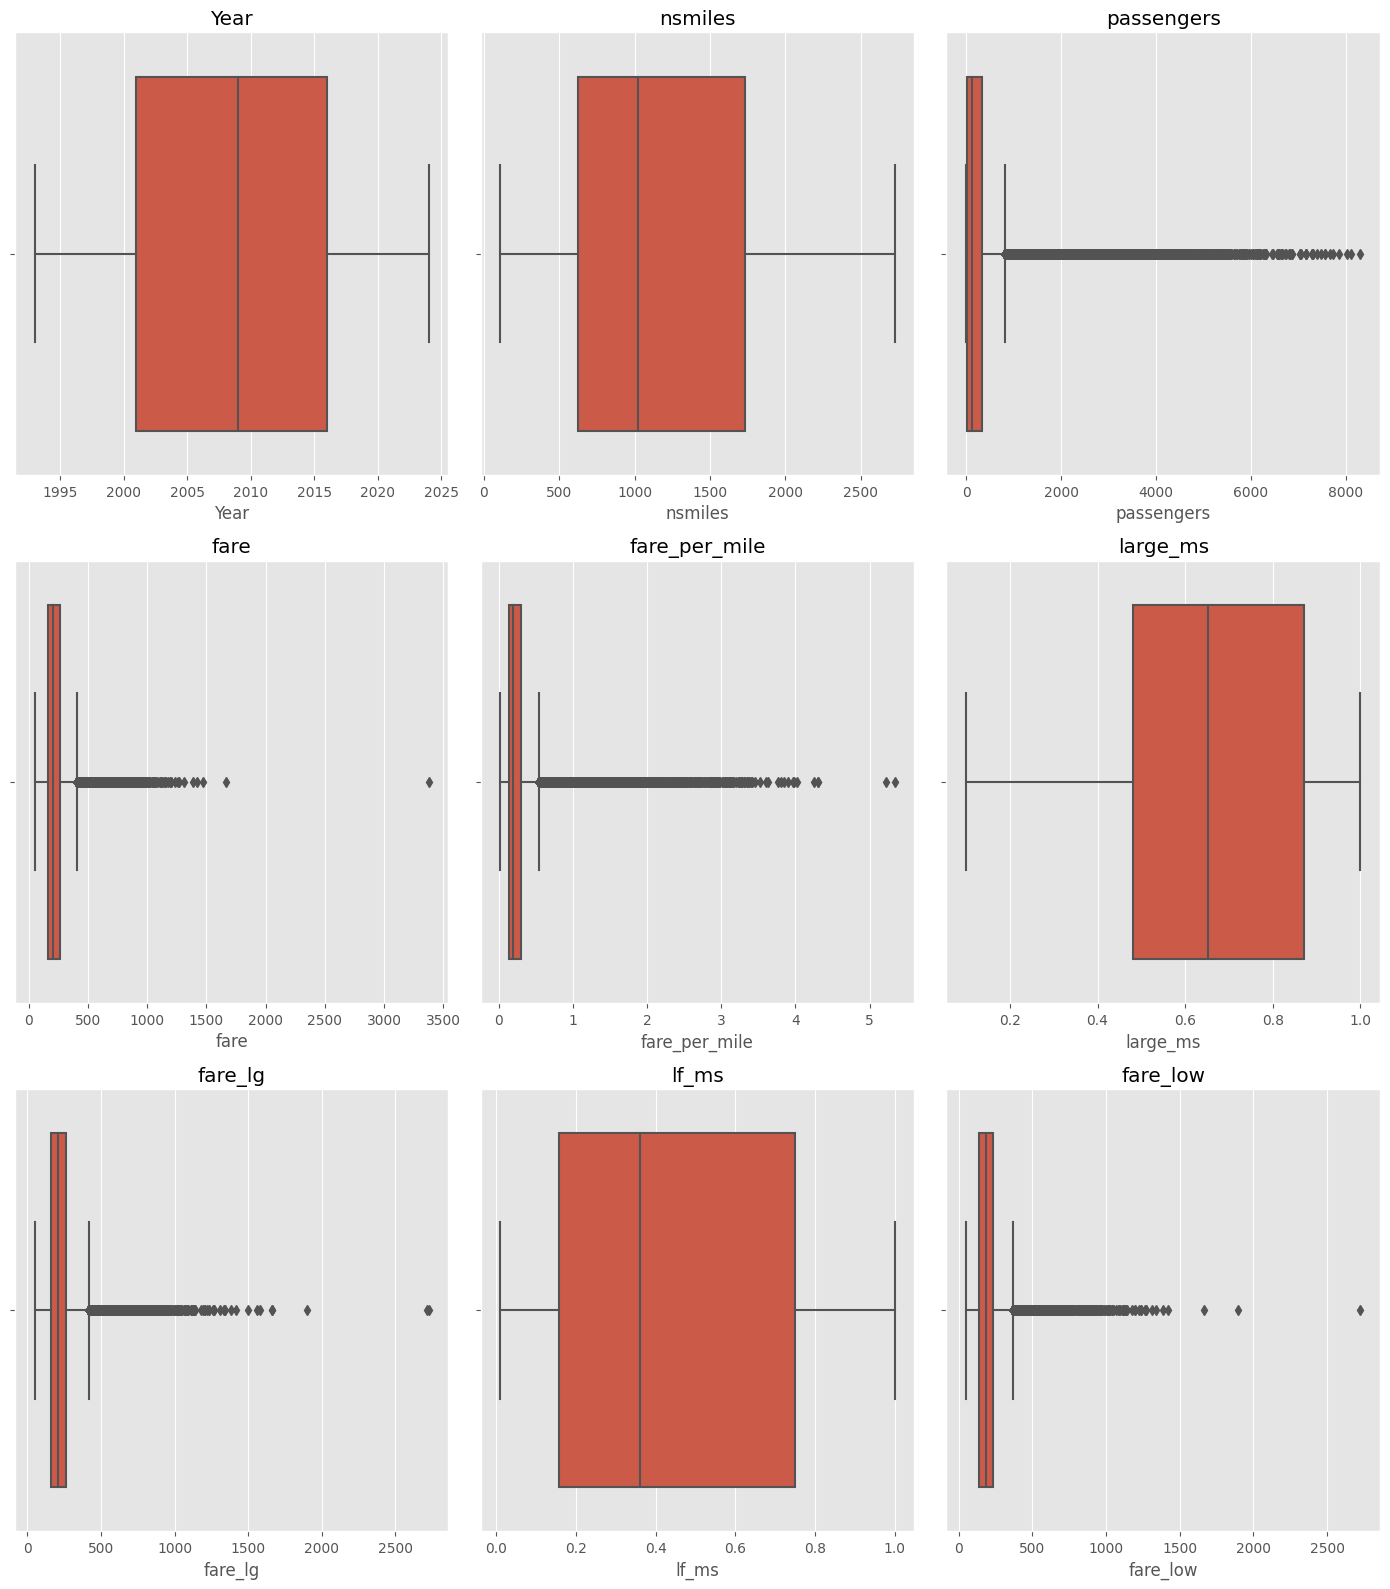

In [27]:
fig , ax = plt.subplots(nrows = 3, ncols = 3 , figsize =(14, 16))
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_title(col)

# Layout'u sıkılaştır
plt.tight_layout()
plt.show()

In [28]:
df.shape

(244343, 18)

In [29]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[num_cols])

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Remove rows with outliers based on Z-score
outlier_rows = outliers.any(axis=1)
df_no_outliers = df[~outlier_rows]


print("Orijinal veri setinin boyutu:", df.shape)
print("Outlier içeren veri setinin boyutu:", df[outlier_rows].shape)
print("Outlier olmayan veri setinin boyutu:", df_no_outliers.shape)

Orijinal veri setinin boyutu: (244343, 18)
Outlier içeren veri setinin boyutu: (13598, 18)
Outlier olmayan veri setinin boyutu: (230745, 18)


### Handling Outliers

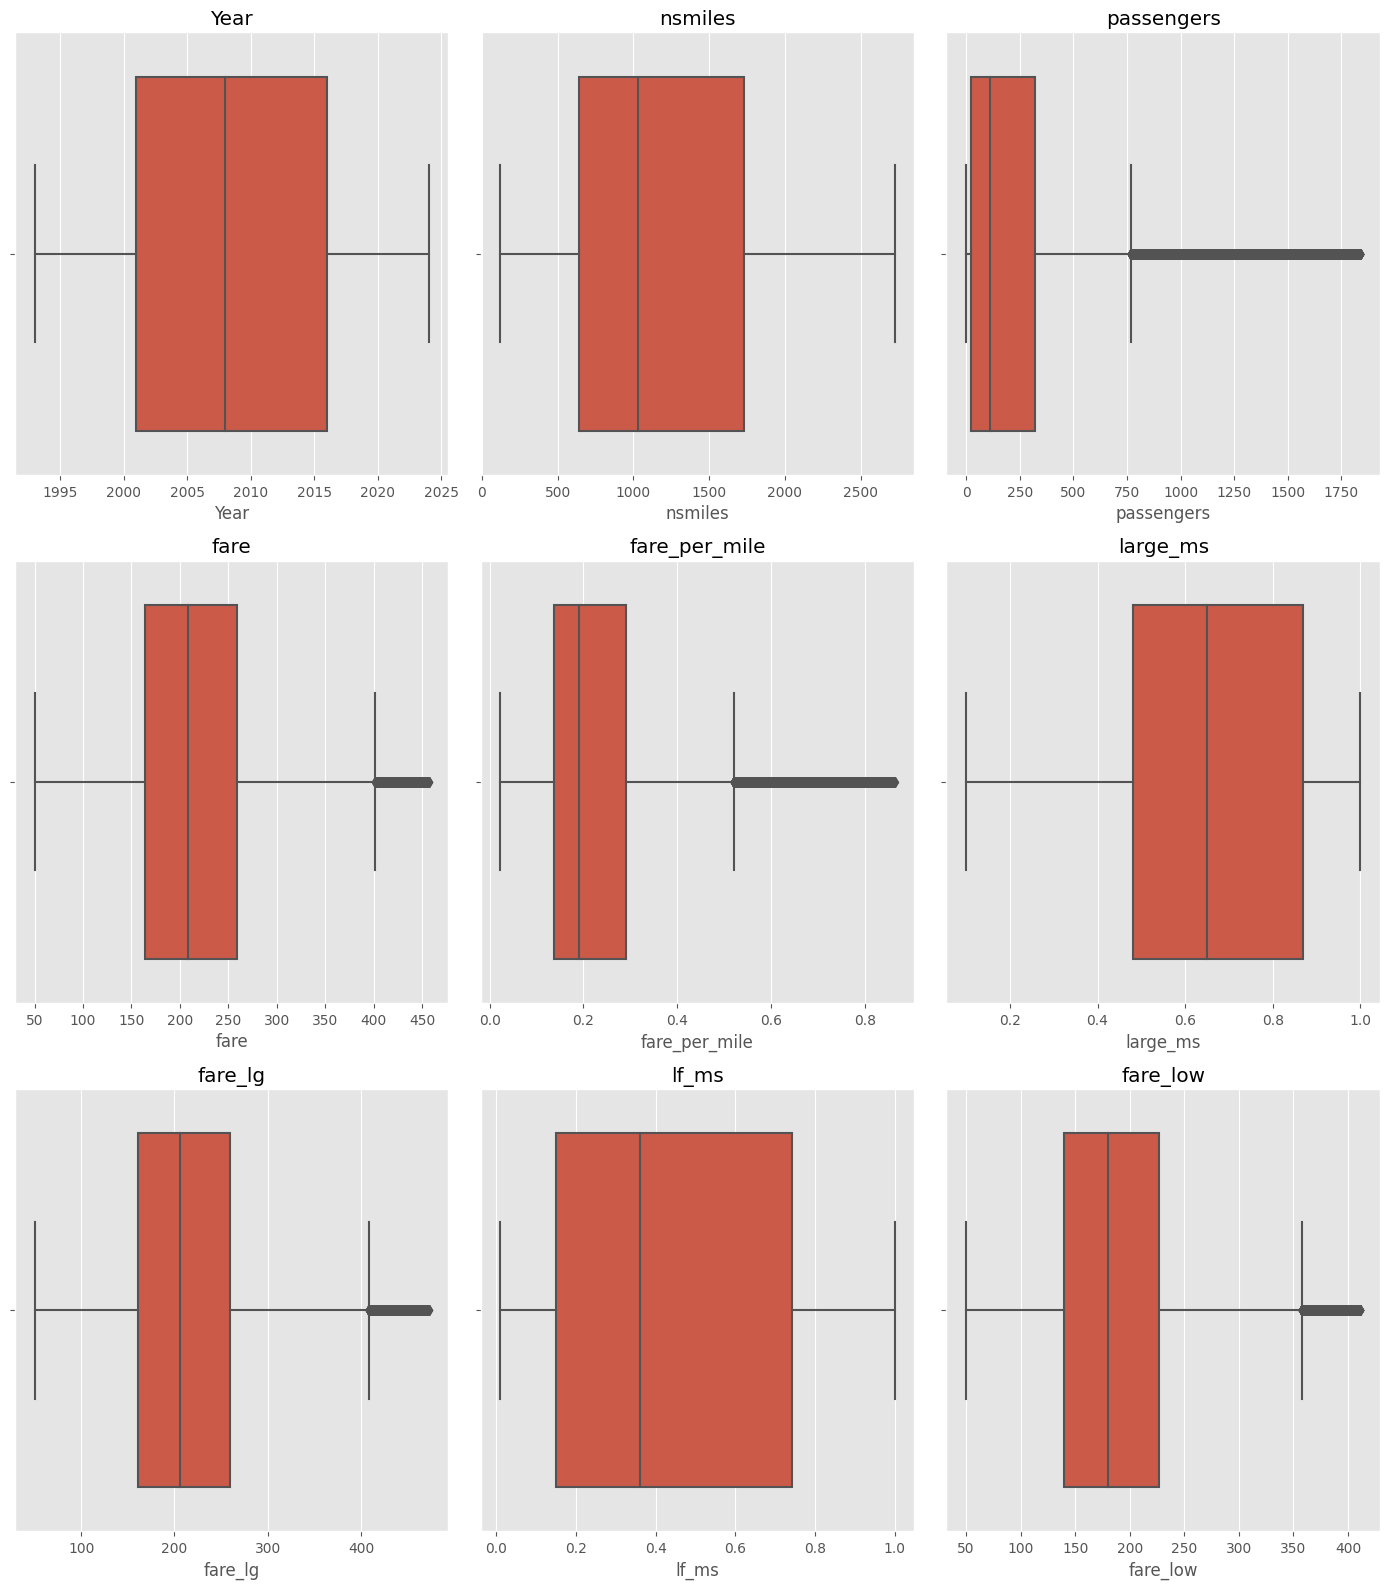

In [30]:
fig , ax = plt.subplots(nrows = 3, ncols = 3 , figsize =(14, 16))
# tüm sayısal değişkenler için boxplot yardımıyla outlier kontrolü yapmak istiyorum.
for i, col in enumerate(num_cols):
    sns.boxplot(data=df_no_outliers, x=col, ax=ax[i // 3, i % 3])  # Doğru indeksleme , bu kısım cehennem gibi ama faydalıydı...
    ax[i // 3, i % 3].set_title(col)


plt.tight_layout() #  grafiklerin düzenini otomatik olarak ayarlıyor.
plt.show()

In [31]:
df = df_no_outliers

In [32]:
df.shape # I want to write df.

(230745, 18)

In [33]:
df.head()

Year  quarter airport_1 airport_2                    dep_city dep_state  \
0  2021        3       ABE       PIE  Allentown/Bethlehem/Easton        PA   
1  2021        3       ABE       TPA  Allentown/Bethlehem/Easton        PA   
2  2021        3       ABQ       DAL                 Albuquerque        NM   
3  2021        3       ABQ       DFW                 Albuquerque        NM   
4  2021        3       ABQ       PHX                 Albuquerque        NM   

           dest_city               dest_state  nsmiles  passengers    fare  \
0              Tampa   FL (Metropolitan Area)      970         180   81.43   
1              Tampa   FL (Metropolitan Area)      970          19  208.93   
2  Dallas/Fort Worth                       TX      580         204  184.56   
3  Dallas/Fort Worth                       TX      580         264  182.64   
4            Phoenix                       AZ      328         398  177.11   

   fare_per_mile carrier_lg  large_ms  fare_lg carrier_low   lf_ms  fare_low  
0       0.083948         G4    1.0000    81.43          G4  1.0000     81.43  
1       0.215392         DL    0.4659   219.98          UA  0.1193    154.11  
2       0.318207         WN    0.9968   184.44          WN  0.9968    184.44  
3       0.314897         AA    0.9774   183.09          AA  0.9774    183.09  
4       0.539970         WN    0.6061   184.49          AA  0.3939    165.77

# Univariate Analysis

Univariate analysis is a statistical method that examines the distribution, central tendency and spread of a variable within itself. The aim is to describe and summarize the characteristics of a variable.

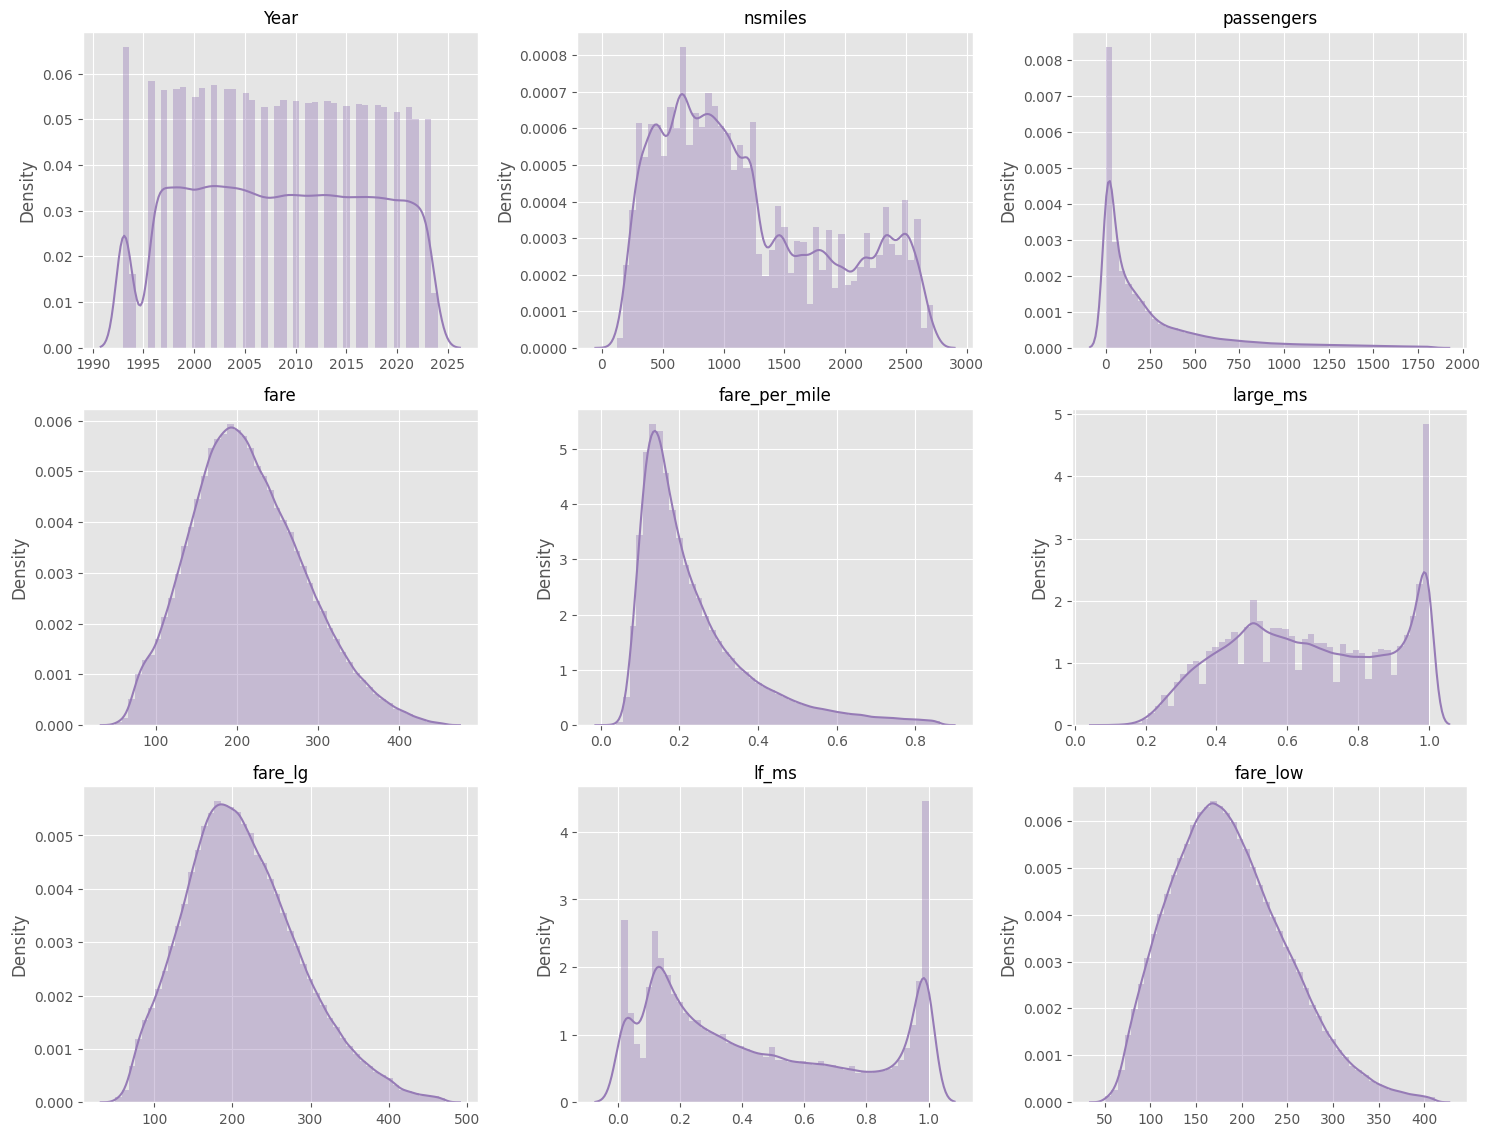

In [34]:
fig = plt.figure(figsize=(15,15))
for index,column in enumerate(num_cols):
    plt.subplot(4,3,index+1)
    sns.distplot(x = df.loc[:, column], color = '#967bb6')
    plt.title(column, size = 12)
    fig.tight_layout()
    plt.grid(True)
plt.show()

we can see in the output what the probability density functions of the features look like.

When the distributions are analyzed, skewness attracts attention.


Generally, statistical techniques focus on the center of the data. The increase in the number of peaks also increases the number of centers, which can cause confusion in the results.

# Skewness-Kurtosis and Normality Tests

**Skewness**: A value between -1 and 1 indicates a symmetric distribution, while a value less than -1 or greater than 1 indicates a high skewness.

**Kurtosis**: A value between -2 and 2 indicates a normal kurtosis (mesokurtic), while a value less than -2 or greater than 2 indicates a very flat or peaked distribution.

**p-value**: This value is used to check whether the normal distribution assumption is met or not. If the p-value is less than 0.05, the normal distribution assumption is not met.

**Shapiro-Wilk**: If the p-value is greater than 0.05, it is displayed as "Yes". Otherwise, it is displayed as "No". Thats my favorite.

Let's check out : 

In [35]:
from tabulate import tabulate
from scipy.stats import skew, kurtosis, normaltest, shapiro 

skewness = df[num_cols].skew()
kurtosisness = df[num_cols].kurtosis()

headers = ['Variable', 'Shapiro Test', 'Skewness C.', 'Skewness', 'Kurtosis C.', 'Kurtosis']

table_data = []
for col in num_cols:
    stat, p = normaltest(df[col])
    skewness_val = f'{skewness[col]:.4f}'
    skewness_desc = 'High skewness' if skewness[col] < -1 or skewness[col] > 1 else 'Symmetric or slightly skewed'
    kurtosis_val = f'{kurtosisness[col]:.4f}'
    kurtosis_desc = 'Very flat or peaked' if kurtosisness[col] < -2 or kurtosisness[col] > 2 else 'Normal or slightly flat'

    stat_sh, p_sh = shapiro(df[col])
    shapiro_test = 'Yes' if p_sh >= 0.05 else 'No'
    
    table_data.append([col, shapiro_test, skewness_val, skewness_desc, kurtosis_val, kurtosis_desc])

table = tabulate(table_data, headers, tablefmt='pretty')
print(table)

+---------------+--------------+-------------+------------------------------+-------------+-------------------------+
|   Variable    | Shapiro Test | Skewness C. |           Skewness           | Kurtosis C. |        Kurtosis         |
+---------------+--------------+-------------+------------------------------+-------------+-------------------------+
|     Year      |      No      |   -0.0100   | Symmetric or slightly skewed |   -1.1342   | Normal or slightly flat |
|    nsmiles    |      No      |   0.5711    | Symmetric or slightly skewed |   -0.8258   | Normal or slightly flat |
|  passengers   |      No      |   2.1434    |        High skewness         |   4.6092    |   Very flat or peaked   |
|     fare      |      No      |   0.3900    | Symmetric or slightly skewed |   -0.1214   | Normal or slightly flat |
| fare_per_mile |      No      |   1.6638    |        High skewness         |   2.8356    |   Very flat or peaked   |
|   large_ms    |      No      |   -0.0385   | Symmetric

Looking at the results, we can see that we are not working with too skewed data.

We may wonder which quarter of the year has more flights. A pie chart can be used to look at the distribution of categorical variables.

So let's use it:


quarter
1    59936
3    57480
4    56733
2    56596
Name: count, dtype: int64

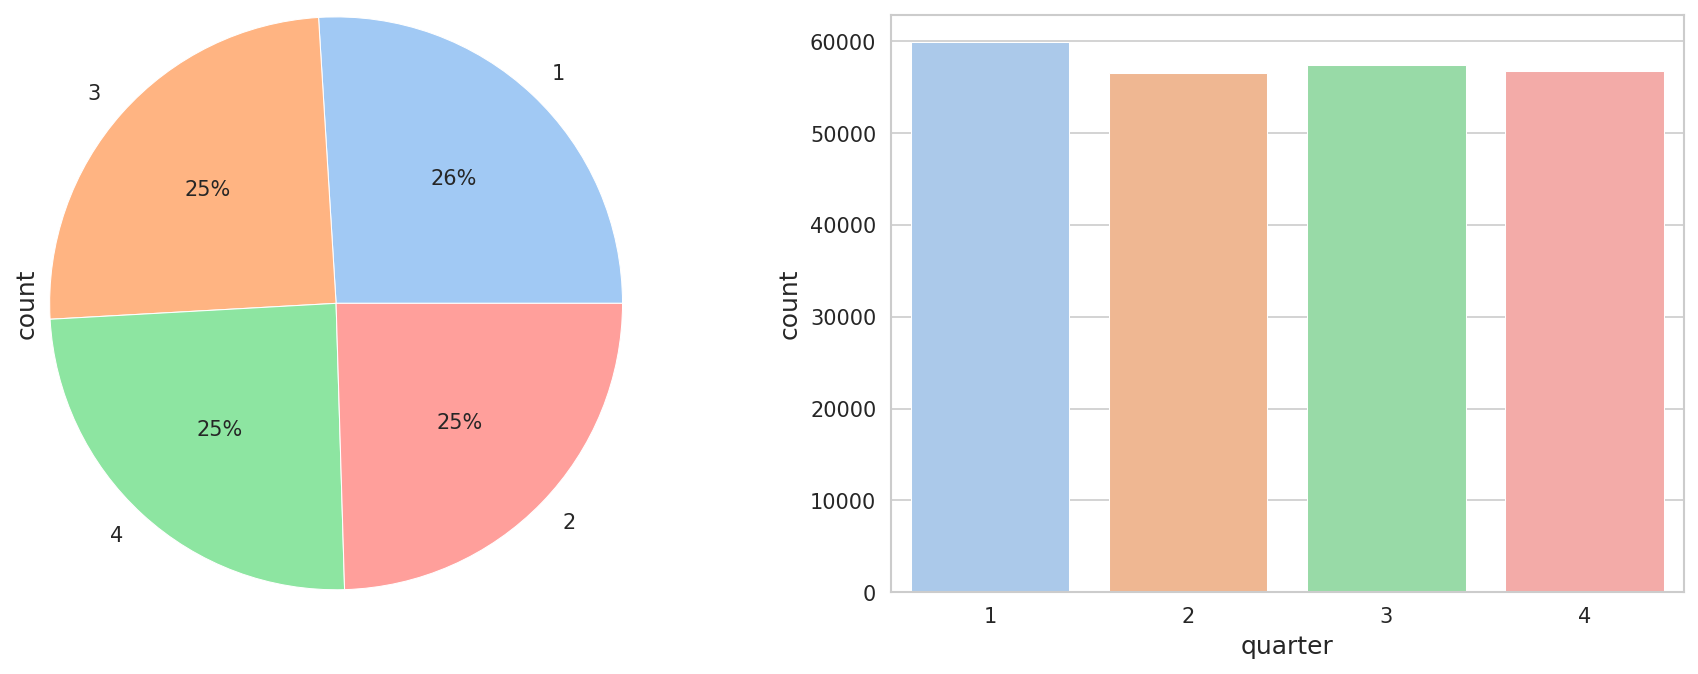

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(121)
df['quarter'].value_counts().plot(kind='pie', autopct='%2.f%%', radius=1.24, colors=sns.color_palette('pastel'))
plt.subplot(122)
sns.countplot(data=df, x='quarter', palette='pastel')
df['quarter'].value_counts()

As seen in the graph, all subcategories of the "quarter" variable have almost the same frequency.

**How are the fare, nsmiles , and fare_per_mile distributed?**

It may be seen as a detail above, but I also wanted to look at it again with a focus on these.

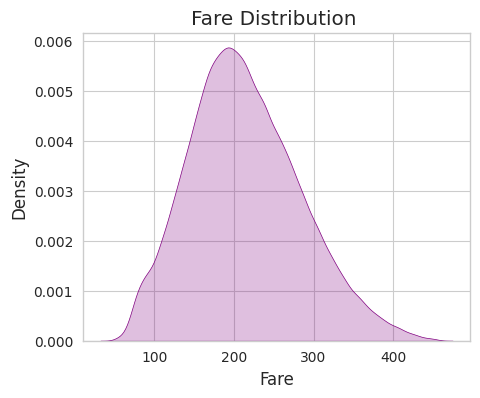

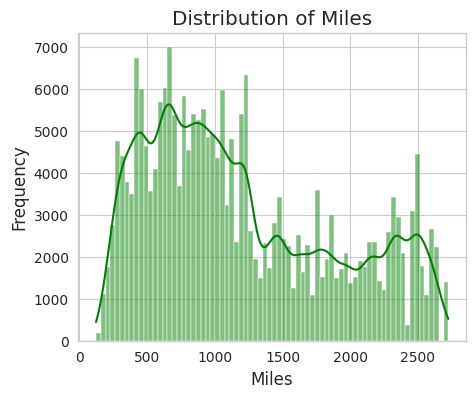

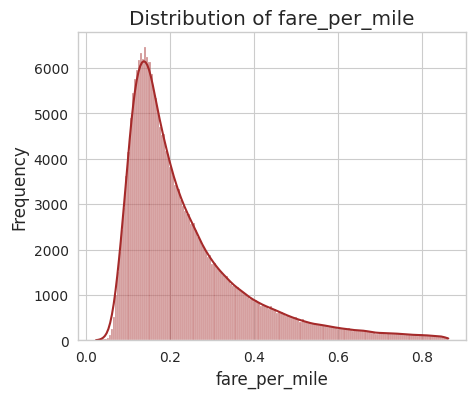

In [37]:
plt.figure(figsize=(5, 4))
sns.kdeplot(data = df['fare'], color='purple', fill=True)

plt.title('Fare Distribution ')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

# Distribution of nsmiles
plt.figure(figsize=(5, 4))
sns.histplot(df['nsmiles'], kde=True, color='green')
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

# mil başına ödenenen ücret 
plt.figure(figsize=(5, 4))
sns.histplot(df['fare_per_mile'], kde=True, color='brown')
plt.title('Distribution of fare_per_mile')
plt.xlabel('fare_per_mile')
plt.ylabel('Frequency')
plt.show()
# mil başına ödenen ücret yükseldikçe sıklık da düşüyor.

# Bivariate Analysis

The aim will be to create breakdowns by including a second variable and observe the effect of the variables on each other as a result of these breakdowns.


In [38]:
df["cat_fare"] = pd.cut(df.fare , [50,100,150,200,350,457] ,labels=["cheap", "medium_cheap", "less_expensive", "expensive", "very_expensive"])

In [39]:
df["cat_quarter"] = pd.cut(df.quarter ,[0,1,2,3,4] ,labels=[1,2,3,4]) # add hue if you want.

In [40]:
df.columns

Index(['Year', 'quarter', 'airport_1', 'airport_2', 'dep_city', 'dep_state',
       'dest_city', 'dest_state', 'nsmiles', 'passengers', 'fare',
       'fare_per_mile', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low',
       'lf_ms', 'fare_low', 'cat_fare', 'cat_quarter'],
      dtype='object')

**What is the relationship between fare_per_mile and nsmiles?**

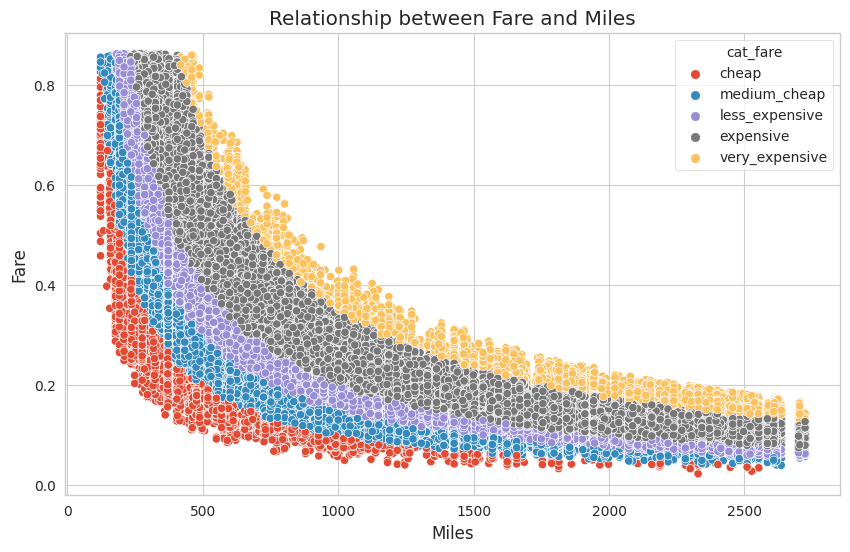

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nsmiles', y='fare_per_mile',hue = 'cat_fare', data=df)
plt.title('Relationship between Fare and Miles')
plt.xlabel('Miles')
plt.ylabel('Fare')
plt.show()
# this is the graph that shows how I grouped the prices :)

**What is the average fare by year?**

<Axes: xlabel='Year', ylabel='fare'>

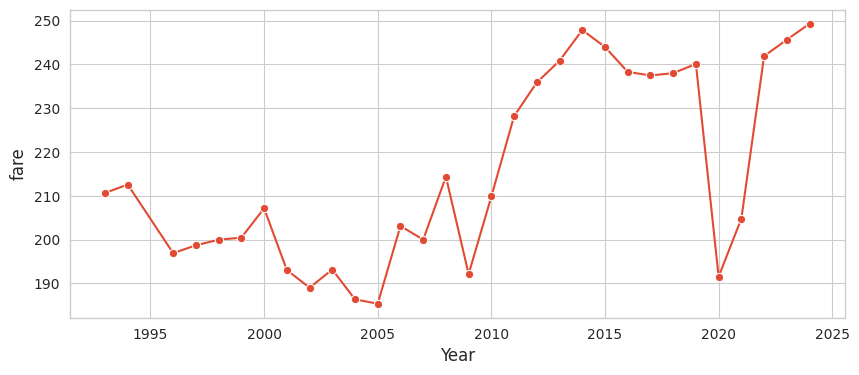

In [42]:
plt.figure(figsize=(10, 4))

sns.lineplot(x = "Year" , y = "fare" , data=df.groupby('Year')['fare'].mean().reset_index() , marker = "o" )

**How does the passenger count vary across different dep_city ?**

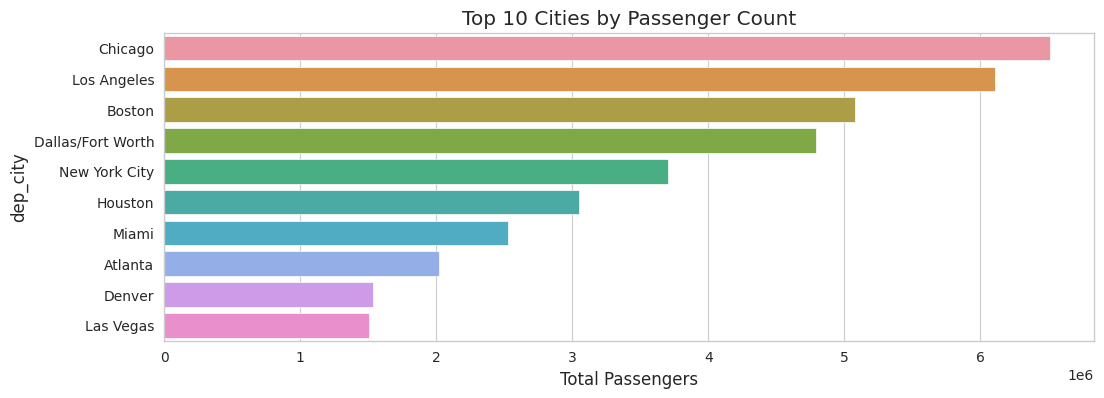

In [43]:
plt.figure(figsize=(12, 4))
top_cities = df.groupby('dep_city')['passengers'].sum().nlargest(10).reset_index()
sns.barplot(x='passengers', y='dep_city', data=top_cities)
plt.title('Top 10 Cities by Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('dep_city')
plt.show()

How does the passenger count vary across different dep_state ?

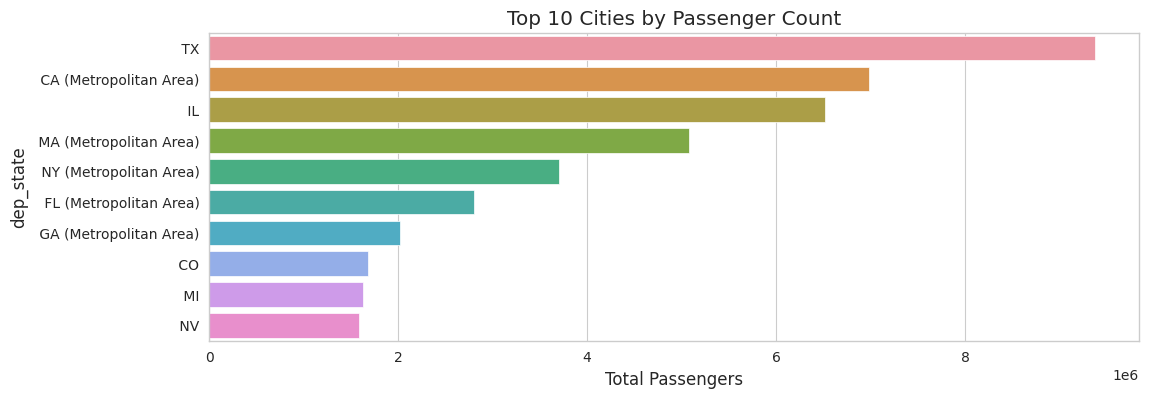

In [44]:
plt.figure(figsize=(12, 4))
top_cities = df.groupby('dep_state')['passengers'].sum().nlargest(10).reset_index()
sns.barplot(x='passengers', y='dep_state', data=top_cities)
plt.title('Top 10 Cities by Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('dep_state')
plt.show()

**What are the busiest airports in terms of passenger count?**

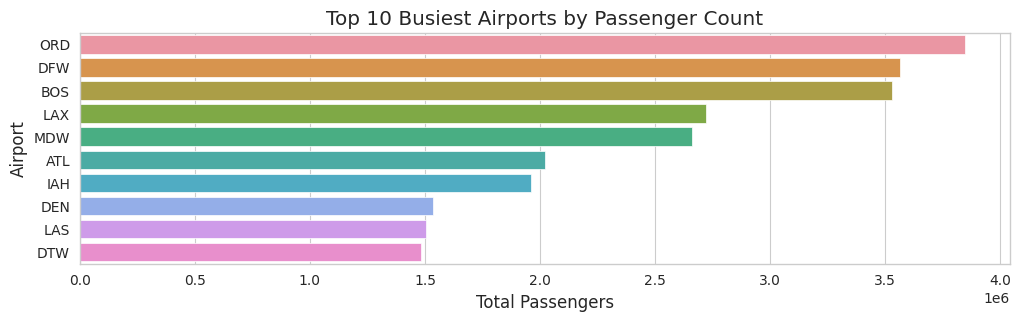

In [45]:
# Group by airport_1 and airport_2 separately and sum passengers
airport1_passengers = df.groupby('airport_1')['passengers'].sum().reset_index()
airport2_passengers = df.groupby('airport_2')['passengers'].sum().reset_index()

# Concatenate the results
busiest_airports = pd.concat([airport1_passengers, airport2_passengers], ignore_index=True)
busiest_airports = busiest_airports.groupby('airport_1')['passengers'].sum().reset_index()

# Top 10 busiest airports
top_airports = busiest_airports.nlargest(10, 'passengers')

plt.figure(figsize=(12, 3))
sns.barplot(x='passengers', y='airport_1', data=top_airports)
plt.title('Top 10 Busiest Airports by Passenger Count')
plt.xlabel('Total Passengers')
plt.ylabel('Airport')
plt.show()

**How does market share (large_ms vs lf_ms) vary across different year?**

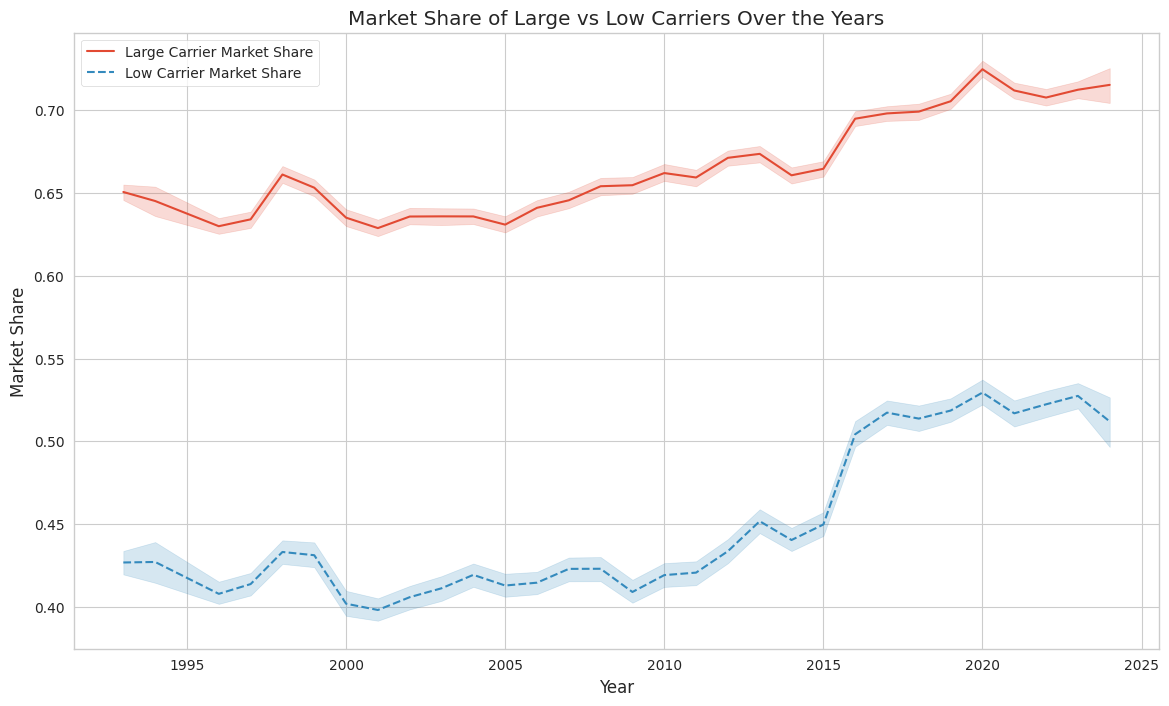

In [46]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='large_ms', data=df, label='Large Carrier Market Share')
sns.lineplot(x='Year', y='lf_ms', data=df, label='Low Carrier Market Share', linestyle='--')
plt.title('Market Share of Large vs Low Carriers Over the Years')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.legend()
plt.show()

# Correlation analysis : 

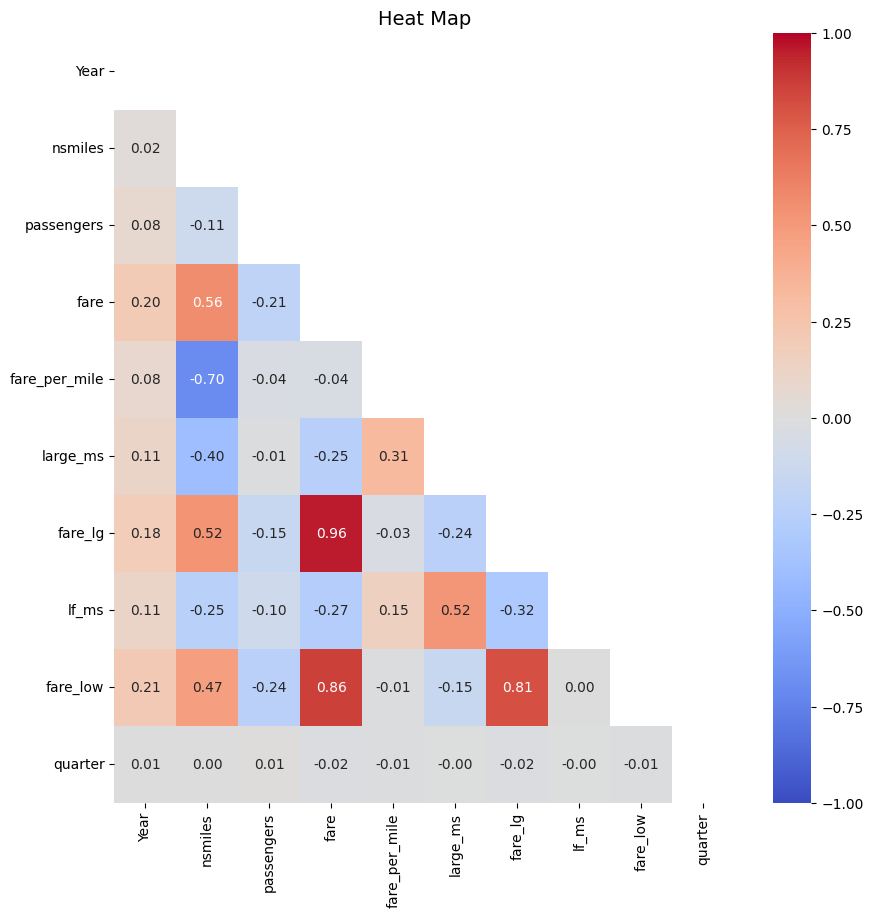

In [47]:
col_list_for_corr = num_cols + ["quarter"]
plt.style.use('default')
mask = np.zeros_like(df[col_list_for_corr].corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[col_list_for_corr].corr(numeric_only=True), annot=True, fmt='.2f',
            vmin=-1, vmax=1,
            ax=ax, cmap='coolwarm', mask=mask)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heat Map', size=14)
plt.show()

In [48]:
df.columns

Index(['Year', 'quarter', 'airport_1', 'airport_2', 'dep_city', 'dep_state',
       'dest_city', 'dest_state', 'nsmiles', 'passengers', 'fare',
       'fare_per_mile', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low',
       'lf_ms', 'fare_low', 'cat_fare', 'cat_quarter'],
      dtype='object')

In [49]:
df.drop(columns=["cat_quarter" , "cat_fare"] , inplace=True)

In [50]:
df.columns

Index(['Year', 'quarter', 'airport_1', 'airport_2', 'dep_city', 'dep_state',
       'dest_city', 'dest_state', 'nsmiles', 'passengers', 'fare',
       'fare_per_mile', 'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low',
       'lf_ms', 'fare_low'],
      dtype='object')

In [51]:
# df.to_csv('Flights.csv')